In [1]:
# IMPORTING THE REQUIRED LIBRARIES 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely import wkt
pd.set_option('display.max_columns', None)

In [53]:
import cartoframes
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer, popup_element, size_bins_style

In [2]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data = pd.read_csv('C:/Users/Ram/Desktop/Portland_CARTO_notebook-jason-cityIQ/pedestrian_count_sample.csv')

In [3]:
ped_data = ped_data.dropna()

In [4]:
ped_data.head()

,Unnamed: 0,pedestrianCount_sum,assetUid,latitude,longitude,time
1,0.0,10.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 09:00:00 2020
2,1.0,3.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 09:00:00 2020
3,2.0,2.0,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,Sun May 31 09:00:00 2020
4,3.0,4.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,Sun May 31 09:00:00 2020
5,4.0,2.0,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,Sun May 31 09:00:00 2020


In [ ]:
#######################
#######################

In [9]:
# PORTLAND DATA

portland_data = pd.read_csv('~/Downloads/Final_merged_city_portland.csv')

In [10]:
portland_data

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,162.0,1859.0,97009,0.000000,0.000000,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,149.0,1960.0,97009,0.000000,0.000000,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,139.0,1998.0,97009,0.000000,0.000000,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,129.0,2087.0,97009,0.000000,0.000000,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,120.0,2191.0,97009,0.000000,0.000000,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,1967,41051009000,POINT (-122.5306977041103 45.49261599741428),2013,MULTIPOLYGON (((-122.5377964271651 45.48742414...,3615.0,8815.0,5598.0,250.0,333.0,155.0,2979.0,97266,8.853565,0.551060,0.378900,0.112082,0.931354,0.138866,0.149101,0.751591,0.000000,0.037344
2604,1969,41051009000,POINT (-122.5306977041103 45.49261599741428),2014,MULTIPOLYGON (((-122.5377964271651 45.48742414...,4006.0,9787.0,6067.0,372.0,404.0,157.0,3105.0,97266,9.739884,0.569364,0.398079,0.100848,0.954183,0.119571,0.125312,0.763105,0.000000,0.028208
2605,1971,41051009000,POINT (-122.5306977041103 45.49261599741428),2015,MULTIPOLYGON (((-122.5377964271651 45.48742414...,4525.0,10489.0,6588.0,468.0,340.0,165.0,3248.0,97266,9.739884,0.573218,0.427019,0.094289,0.970642,0.116906,0.120442,0.784530,0.000000,0.013481
2606,1973,41051009000,POINT (-122.5306977041103 45.49261599741428),2016,MULTIPOLYGON (((-122.5377964271651 45.48742414...,4617.0,10809.0,6682.0,422.0,356.0,156.0,3173.0,97266,9.759152,0.589595,0.418818,0.097419,0.956153,0.146415,0.153130,0.750054,0.003465,0.019493


In [73]:
portland_data['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [11]:
##########################
##########################

In [12]:
# CONVERTING THE COLUMNS TO BE COMPATIBLE WITH PLOTTING

portland_data['geometry'] = portland_data['geometry'].apply(wkt.loads)
portland_data['centroid'] = portland_data['centroid'].apply(wkt.loads)
portland_data = gpd.GeoDataFrame(portland_data, geometry='geometry')

In [13]:
portland_data_gdf = gpd.GeoDataFrame(portland_data, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
portland_data_gdf.shape

(2608, 23)

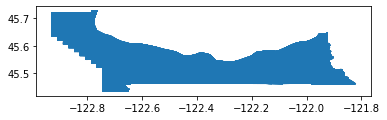

In [15]:
portland_data_gdf.plot()

In [16]:
ped_data_gdf = gpd.GeoDataFrame(ped_data, geometry=gpd.points_from_xy(ped_data.longitude, ped_data.latitude))

In [17]:
ped_data_gdf = gpd.GeoDataFrame(ped_data_gdf, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
ped_data_gdf

,Unnamed: 0,pedestrianCount_sum,assetUid,latitude,longitude,time,geometry
1,0.0,10.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 09:00:00 2020,POINT (-122.62250 45.50472)
2,1.0,3.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 09:00:00 2020,POINT (-122.62269 45.51194)
3,2.0,2.0,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,Sun May 31 09:00:00 2020,POINT (-122.65384 45.50479)
4,3.0,4.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,Sun May 31 09:00:00 2020,POINT (-122.60501 45.50528)
5,4.0,2.0,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,Sun May 31 09:00:00 2020,POINT (-122.63488 45.51197)
6,5.0,0.0,38c192b9-0d6c-41c8-8d26-c5964841fc98,45.504743,-122.636529,Sun May 31 09:00:00 2020,POINT (-122.63653 45.50474)
7,6.0,0.0,3f399bfa-a8cc-4d90-9c5c-f72533efdebd,45.511978,-122.627759,Sun May 31 09:00:00 2020,POINT (-122.62776 45.51198)
8,7.0,3.0,5850139e-58eb-436b-96f7-ecfd4665cc09,45.504801,-122.654883,Sun May 31 09:00:00 2020,POINT (-122.65488 45.50480)
9,8.0,2.0,5db39821-dfb7-441b-8725-d8ab0f0f5b1a,45.504214,-122.537479,Sun May 31 09:00:00 2020,POINT (-122.53748 45.50421)
10,9.0,0.0,678c1456-547c-448d-a86e-78107b53e7c0,45.511984,-122.629695,Sun May 31 09:00:00 2020,POINT (-122.62969 45.51198)


In [19]:
ped_data_gdf.shape

(26, 7)

In [61]:
# SPATIAL JOIN WITH PEDESTRIAN AND PORTLAND

sjoined_listings = gpd.sjoin(ped_data_gdf, portland_data_gdf, op='within',how='right')
sjoined_listings

,index_left,Unnamed: 0_x,pedestrianCount_sum,assetUid,latitude,longitude,time,Unnamed: 0_y,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
743,1.0,0.0,10.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 09:00:00 2020,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,4.0,3.0,4.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,Sun May 31 09:00:00 2020,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,14.0,13.0,1.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,Sun May 31 09:00:00 2020,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,15.0,14.0,7.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,Sun May 31 09:00:00 2020,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
742,1.0,0.0,10.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 09:00:00 2020,165,41051000801,POINT (-122.6108897479948 45.50135311494248),2016,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2810.0,4524.0,3675.0,586.0,611.0,171.0,2033.0,97206,1147.075743,82.837967,0.569187,0.101680,1.000000,0.122776,0.122776,0.643060,0.128114,0.025979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955,41051008902,POINT (-122.5605573563522 45.46743694947033),2013,"MULTIPOLYGON (((-122.57904 45.46437, -122.5686...",1781.0,3659.0,2573.0,264.0,182.0,123.0,1414.0,97266,903.063584,56.208092,0.454769,0.105220,0.913043,0.058956,0.064570,0.799551,0.024144,0.036496
2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956,41051008902,POINT (-122.5605573563522 45.46743694947033),2014,"MULTIPOLYGON (((-122.57904 45.46437, -122.5686...",1744.0,3826.0,2564.0,200.0,204.0,126.0,1453.0,97266,993.468208,58.075145,0.439101,0.104809,0.906977,0.044725,0.049312,0.842317,0.019495,0.049312
2597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957,41051008902,POINT (-122.5605573563522 45.46743694947033),2015,"MULTIPOLYGON (((-122.57904 45.46437, -122.5686...",1922.0,3833.0,2630.0,238.0,237.0,127.0,1411.0,97266,993.468208,58.468208,0.452648,0.095747,0.861842,0.068158,0.079084,0.810094,0.028096,0.049948
2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958,41051008902,POINT (-122.5605713255571 45.46745111423488),2016,"MULTIPOLYGON (((-122.57904 45.46437, -122.5686...",2020.0,3797.0,2582.0,271.0,246.0,125.0,1388.0,97266,995.433526,60.138728,0.451672,0.099026,0.803681,0.064851,0.080693,0.771782,0.023267,0.053960


In [62]:
sjoined_listings.shape

(2808, 30)

In [21]:
######################
######################

In [22]:
veh_data = pd.read_csv('C:/Users/Ram/Desktop/Portland_CARTO_notebook-jason-cityIQ/vehicle_count_sample.csv')
veh_data = veh_data.dropna()

In [23]:
veh_data

,Unnamed: 0,vehicleCount_sum,assetUid,latitude,longitude,time
1,0.0,89.0,01ec53e2-8464-4d0b-b0d4-76e1904d9af7,45.505296,-122.600155,Sun May 31 09:00:00 2020
2,1.0,105.0,042dd578-df60-443d-866f-3b985f881449,45.505321,-122.585876,Sun May 31 09:00:00 2020
3,2.0,92.0,05f04e82-9e3a-4d81-934b-6ba4435c1633,45.505299,-122.599534,Sun May 31 09:00:00 2020
4,3.0,60.0,0735adaf-c6ea-4ae7-9e8c-ee64e1779c02,45.504731,-122.621527,Sun May 31 09:00:00 2020
5,4.0,303.0,13aeaa1d-14ec-44f8-8747-0100817c74bc,45.504492,-122.562557,Sun May 31 09:00:00 2020
...,...,...,...,...,...,...
97,96.0,69.0,eacc5673-e293-4905-8b45-05781f7f1b39,45.505244,-122.611920,Sun May 31 09:00:00 2020
98,97.0,66.0,eb18fdf4-6aa1-41c5-9e69-63d1e2a497d9,45.511992,-122.639129,Sun May 31 09:00:00 2020
99,98.0,238.0,edddbcc6-2501-4f0a-a253-4067a804568b,45.504220,-122.538680,Sun May 31 09:00:00 2020
100,99.0,125.0,f34be8f4-e9f3-46ef-8a6e-c37e937f1253,45.505125,-122.579714,Sun May 31 09:00:00 2020


In [24]:
veh_data_gdf = gpd.GeoDataFrame(veh_data, geometry=gpd.points_from_xy(veh_data.longitude, veh_data.latitude))

In [25]:
veh_data_gdf = gpd.GeoDataFrame(veh_data_gdf, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [27]:
######################
######################

In [37]:
# SPATIAL JOIN WITH PEDESTRIAN AND PORTLAND

sjoined_listings_veh = gpd.sjoin(veh_data_gdf, portland_data_gdf, op='within',how='inner')
sjoined_listings_veh.head()

,Unnamed: 0_left,vehicleCount_sum,assetUid,latitude,longitude,time,geometry,index_right,Unnamed: 0_right,geo_id,centroid,year,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
1,0.0,89.0,01ec53e2-8464-4d0b-b0d4-76e1904d9af7,45.505296,-122.600155,Sun May 31 09:00:00 2020,POINT (-122.60016 45.50530),743,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.79674,84.908917,0.598675,0.077656,1.0,0.131579,0.131579,0.648785,0.113698,0.034413
3,2.0,92.0,05f04e82-9e3a-4d81-934b-6ba4435c1633,45.505299,-122.599534,Sun May 31 09:00:00 2020,POINT (-122.59953 45.50530),743,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.79674,84.908917,0.598675,0.077656,1.0,0.131579,0.131579,0.648785,0.113698,0.034413
4,3.0,60.0,0735adaf-c6ea-4ae7-9e8c-ee64e1779c02,45.504731,-122.621527,Sun May 31 09:00:00 2020,POINT (-122.62153 45.50473),743,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.79674,84.908917,0.598675,0.077656,1.0,0.131579,0.131579,0.648785,0.113698,0.034413
42,41.0,82.0,787d02b5-fc36-4628-89d0-bf83d2514b11,45.505290,-122.603844,Sun May 31 09:00:00 2020,POINT (-122.60384 45.50529),743,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.79674,84.908917,0.598675,0.077656,1.0,0.131579,0.131579,0.648785,0.113698,0.034413
46,45.0,84.0,88af64ef-7b5f-4c60-ab6c-18e556592a91,45.505264,-122.608187,Sun May 31 09:00:00 2020,POINT (-122.60819 45.50526),743,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.79674,84.908917,0.598675,0.077656,1.0,0.131579,0.131579,0.648785,0.113698,0.034413


In [71]:
sjoined_listings_veh.shape
# veh_data_gdf.shape
# portland_data_gdf.shape

(1560, 30)

In [48]:
sjoined_listings_veh['geometry'] = sjoined_listings_veh['geometry'].apply(wkt.loads)
sjoined_listings_veh['centroid'] = sjoined_listings_veh['centroid'].apply(wkt.loads)
sjoined_listings_veh = gpd.GeoDataFrame(sjoined_listings_veh, geometry='geometry')

In [49]:
sjoined_listings_veh_gdf = gpd.GeoDataFrame(sjoined_listings_veh, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [65]:
sjoined_listings_gdf = gpd.GeoDataFrame(sjoined_listings, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [70]:
Map([Layer(portland_data_gdf),Layer(sjoined_listings_veh_gdf)])